<h3>Topik yang dipilih : Sekolah Kedinasan.</h3>
Data yang diambil merupakan data yang berkaitan dengan sekolah kedinasan yang baru-baru ini diadakan oleh beberapa instansi pemerintahan. Hal ini menarik karena sekolah dinas ini menjadi salah satu wadah atau kesempatan bagi para generasi muda terutama yang baru saja lulus sekolah untuk melanjutkan studi mereka di lingkungan lembaga/instansi pemerintahan. Dengan pemilihan topik ini kita akan bisa menganalisis mengenai informasi, minat serta tanggapan dari masyarakat mengenai pengadaan sekolah kedinasan tersebut. Diharapakan dengan analisis ini bisa memberi masukan untuk kedepannya jika ada sesuatu yang dirasa perlu perbaikan. 

<h4>Data Collection</h4>
Pengumpulan data akan kita lakukan dari twitter dan salah satu sumber berita, disini kita menggunakan situs detik.com.


In [1]:
#import semua yang kita butuhkan

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, string, nltk, datetime
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import seaborn as sns

from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request
from mysql_db import MySqlDB

In [2]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

Kata kunci yang dipakai adalah sekolah kedinasan dan tweet diambil dari tanggal 6 April 2022 sampai hari ini (9 April 2022).

In [4]:
api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

query= "sekolah kedinasan -is:retweet lang:id"
start = datetime.datetime(2022,4,6)
response = tweepy.Paginator(api.search_recent_tweets,start_time=start,
                          query = query
                          ).flatten()

tweets = [tweet.text.strip() for tweet in response]
df_tweets = pd.DataFrame(tweets, columns=["tweet"])
df_tweets

,tweet
0,Kemenkumham Buka Pendaftaran Sekolah Kedinasan...
1,"Halo #SobatKiBe, @kemenkumhamri kembali membuk..."
2,"Buka https://t.co/8rKjCd9Sfx, Ini Alur dan Car..."
3,"Dibuka 9 April 2022, intip dulu jadwal, syarat..."
4,*Kemenkumham Buka Pendaftaran Sekolah Kedinasa...
...,...
521,"pembukaan sekolah kedinasan udah mau buka, wis..."
522,@subschfess Sekolah kedinasan banyak hitung hi...
523,"In case you don’t know, pendaftaran sekolah ke..."
524,@sbmptnfess nih nder ada sekolah kedinasan yan...


Data disimpan dalam bentuk csv dengan nama tweets_sekolahdinas.csv

In [5]:
df_tweets.to_csv("tweets_sekolahdinas.csv", index=False)

Proses pengumpulan data dengan webscrabing dari situs detik.com dengan menggunakan kata kunci sekolah kedinasan.

In [2]:
#siapkan semua parameter
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36"
headers = {
    'User-Agent': user_agent
}

alamat = "https://www.detik.com/search/searchall?query=sekolah+kedinasan&siteid=2"

In [3]:
#request- response
data_request = Request(alamat, headers=headers)
response2 = urlopen(data_request)

In [4]:
#masukkan dalam objek beautifulsoup
soup = bs(response2, "html.parser")

In [5]:
articles = soup.find("div", {"class":"list media_rows list-berita"})

In [6]:
titles = articles.find_all("h2", {"class":"title"})

In [7]:
list_title = [title.get_text().rstrip() for title in titles]

In [28]:
#menyimpan dalam sql
db = MySqlDB()
db.open_connection()
db.insert_titles(list_title)

Koneksi Berhasil

                INSERT INTO ARTIKEL (title)
                VALUES ("Sekolah Kedinasan 2022 Dibuka, Simak Syarat dan Cara Daftar di Sini!")
                

                INSERT INTO ARTIKEL (title)
                VALUES ("Jurusan di PKN STAN, Daftar di Seleksi Sekolah Kedinasan 2022 Mulai 9 April")
                

                INSERT INTO ARTIKEL (title)
                VALUES ("Pendaftaran Sekolah Kedinasan 2022: Ini Syarat Dokumen PKN STAN hingga STIN")
                

                INSERT INTO ARTIKEL (title)
                VALUES ("Sistem Gugur di PKN STAN, Drop Out jika Tak Memenuhi Syarat Kelulusan")
                

                INSERT INTO ARTIKEL (title)
                VALUES ("Daftar Sekolah Kedinasan Mulai Besok, Cek Skor Ambang Batas SKD")
                

                INSERT INTO ARTIKEL (title)
                VALUES ("PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Berapa Jumlahnya?")
                

                INSERT INTO ART

In [29]:
#melihat data
db.search_all()

(1, 'Sekolah Kedinasan 2022 Dibuka, Simak Syarat dan Cara Daftar di Sini!')
(2, 'Jurusan di PKN STAN, Daftar di Seleksi Sekolah Kedinasan 2022 Mulai 9 April')
(3, 'Pendaftaran Sekolah Kedinasan 2022: Ini Syarat Dokumen PKN STAN hingga STIN')
(4, 'Sistem Gugur di PKN STAN, Drop Out jika Tak Memenuhi Syarat Kelulusan')
(5, 'Daftar Sekolah Kedinasan Mulai Besok, Cek Skor Ambang Batas SKD')
(6, 'PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Berapa Jumlahnya?')
(7, 'Poltek Siber dan Sandi Negara Hanya Terima Pria untuk 2022, BSSN Beri Penjelasan')
(8, 'Klik dikdin.bkn.go.id untuk Daftar Sekolah Kedinasan 2022, Semoga jadi CPNS')
(9, 'Pendaftaran STAN Mulai 9 April, Cek Syarat dan Nilai Rapor yang Dibutuhkan')


In [32]:
#tutup koneksi
db.close_connection()

In [33]:
df = pd.DataFrame(list_title, columns=['Title'])
df

,Title
0,"Sekolah Kedinasan 2022 Dibuka, Simak Syarat da..."
1,"Jurusan di PKN STAN, Daftar di Seleksi Sekolah..."
2,Pendaftaran Sekolah Kedinasan 2022: Ini Syarat...
3,"Sistem Gugur di PKN STAN, Drop Out jika Tak Me..."
4,"Daftar Sekolah Kedinasan Mulai Besok, Cek Skor..."
5,"PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Be..."
6,Poltek Siber dan Sandi Negara Hanya Terima Pri...
7,Klik dikdin.bkn.go.id untuk Daftar Sekolah Ked...
8,"Pendaftaran STAN Mulai 9 April, Cek Syarat dan..."


Data disimpan dalam bentuk csv dengan nama news_sekolahdinas.csv

In [36]:
df.to_csv("news_sekolahdinas.csv", index=False)


<h4>Data Preparation</h4>
Dalam data preparation ini kita melakukan text-preprocessing dengan Case Folding, Stopwords, dan Stemming.


Pertama kita baca 'tweets_sekolahdinas.csv' dan tampilkan dalam bentuk dataframe

In [13]:
#baca file 'tweets_sekolahdinas.csv'
data_tweets = pd.read_csv('tweets_sekolahdinas.csv')

#tampil dataframe 
data_tweets

,tweet
0,Kemenkumham Buka Pendaftaran Sekolah Kedinasan...
1,"Halo #SobatKiBe, @kemenkumhamri kembali membuk..."
2,"Buka https://t.co/8rKjCd9Sfx, Ini Alur dan Car..."
3,"Dibuka 9 April 2022, intip dulu jadwal, syarat..."
4,*Kemenkumham Buka Pendaftaran Sekolah Kedinasa...
...,...
521,"pembukaan sekolah kedinasan udah mau buka, wis..."
522,@subschfess Sekolah kedinasan banyak hitung hi...
523,"In case you don’t know, pendaftaran sekolah ke..."
524,@sbmptnfess nih nder ada sekolah kedinasan yan...


Dari dataframe tersebut kita melakukan pembersihan dengan case folding, menghapus stopword, menghilangkan kata slang, kemudian menyimpannya kedalam kolom baru bernama 'clean_tweet'. Setelah itu kita tampilkan kembali dataframe tersebut dengan hasil pembersihan yang telah dilakukan.

In [14]:
# Case folding
def case_folding (tweet):
    
    tweet = tweet.lower() 
    tweet = re.sub(r"\d+", "", tweet)
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = tweet.rstrip().lstrip()

    return tweet

def remove_stopword(tweet):
    list_stopwords = stopwords.words('indonesian')
    querywords = tweet.split()
    resultwords  = [word for word in querywords if word not in list_stopwords]
    result = ' '.join(resultwords)
    
    return result

def remove_slang(tweet):
    st = PorterStemmer()
    result = st.stem(tweet)
    return result

if __name__ == '__main__' :
    tweet= str(data_tweets['tweet'])
    clean = data_tweets['tweet'].apply(case_folding)
    clean = clean.apply(remove_stopword)
    clean = clean.apply(remove_slang)
    data_tweets.insert(1, column="clean_tweet", value=clean)
    display(data_tweets)

,tweet,clean_tweet
0,Kemenkumham Buka Pendaftaran Sekolah Kedinasan...,kemenkumham buka pendaftaran sekolah kedinasan...
1,"Halo #SobatKiBe, @kemenkumhamri kembali membuk...",halo sobatkibe kemenkumhamri membuka seleksi p...
2,"Buka https://t.co/8rKjCd9Sfx, Ini Alur dan Car...",buka httpstcorkjcdsfx alur akun pendaftaran se...
3,"Dibuka 9 April 2022, intip dulu jadwal, syarat...",dibuka april intip jadwal syarat daftar sekola...
4,*Kemenkumham Buka Pendaftaran Sekolah Kedinasa...,kemenkumham buka pendaftaran sekolah kedinasan...
...,...,...
521,"pembukaan sekolah kedinasan udah mau buka, wis...",pembukaan sekolah kedinasan udah buka wish me ...
522,@subschfess Sekolah kedinasan banyak hitung hi...,subschfess sekolah kedinasan hitung hitunganny...
523,"In case you don’t know, pendaftaran sekolah ke...",in case you don’t know pendaftaran sekolah ked...
524,@sbmptnfess nih nder ada sekolah kedinasan yan...,sbmptnfess nih nder sekolah kedinasan buka tau...


Selanjutnya kita baca data kedua yaitu 'news_sekolahdinas.csv' ke dalam bentuk dataframe

In [3]:
#baca file 'news_sekolahdinas.csv'
data_news = pd.read_csv('news_sekolahdinas.csv')

#tampil dataframe 
data_news

,Title
0,"Sekolah Kedinasan 2022 Dibuka, Simak Syarat da..."
1,"Jurusan di PKN STAN, Daftar di Seleksi Sekolah..."
2,Pendaftaran Sekolah Kedinasan 2022: Ini Syarat...
3,"Sistem Gugur di PKN STAN, Drop Out jika Tak Me..."
4,"Daftar Sekolah Kedinasan Mulai Besok, Cek Skor..."
5,"PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Be..."
6,Poltek Siber dan Sandi Negara Hanya Terima Pri...
7,Klik dikdin.bkn.go.id untuk Daftar Sekolah Ked...
8,"Pendaftaran STAN Mulai 9 April, Cek Syarat dan..."


Dari dataframe data news tersebut kita melakukan pembersihan dengan case folding, menghapus stopword, menghilangkan kata slang, kemudian menyimpannya kedalam kolom baru bernama 'clean_title'. Setelah itu kita tampilkan kembali dataframe dari hasil pembersihan yang telah dilakukan

In [4]:
# Case folding
def case_folding_news (judul):
    
    judul = judul.lower() 
    judul = re.sub(r"\d+", "", judul)
    judul = judul.translate(str.maketrans("","",string.punctuation))
    judul = judul.rstrip().lstrip()

    return judul

def remove_stopword_news(judul):
    list_stopwords = stopwords.words('indonesian')
    querywords = judul.split()
    resultwords  = [word for word in querywords if word not in list_stopwords]
    result = ' '.join(resultwords)
    
    return result

def remove_slang_news(judul):
    st = PorterStemmer()
    result = st.stem(judul)
    return result

if __name__ == '__main__' :
    judul= str(data_news['Title'])
    clean = data_news['Title'].apply(case_folding_news)
    clean = clean.apply(remove_stopword_news)
    clean = clean.apply(remove_slang_news)
    data_news.insert(1, column="clean_title", value=clean)
    display(data_news)

,Title,clean_title
0,"Sekolah Kedinasan 2022 Dibuka, Simak Syarat da...",sekolah kedinasan dibuka simak syarat daftar
1,"Jurusan di PKN STAN, Daftar di Seleksi Sekolah...",jurusan pkn stan daftar seleksi sekolah kedina...
2,Pendaftaran Sekolah Kedinasan 2022: Ini Syarat...,pendaftaran sekolah kedinasan syarat dokumen p...
3,"Sistem Gugur di PKN STAN, Drop Out jika Tak Me...",sistem gugur pkn stan drop out memenuhi syarat...
4,"Daftar Sekolah Kedinasan Mulai Besok, Cek Skor...",daftar sekolah kedinasan besok cek skor ambang...
5,"PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Be...",pkn stan umumkan kuota mahasiswa
6,Poltek Siber dan Sandi Negara Hanya Terima Pri...,poltek siber sandi negara terima pria bssn pen...
7,Klik dikdin.bkn.go.id untuk Daftar Sekolah Ked...,klik dikdinbkngoid daftar sekolah kedinasan se...
8,"Pendaftaran STAN Mulai 9 April, Cek Syarat dan...",pendaftaran stan april cek syarat nilai rapor ...


<h4>Data Processing</h4>
dalam tahapan ini kita akan melakukan Sentiment Data Analysis

Analisis sentimen pertama kita lakukan terhadap data_tweets yang telah kita bersihkan sebelumnya

In [20]:
#Sentiment Analysis dengan memasukkan hasilnya pada dataframe dengan nama kolom "sentiment"

with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

hasil = []

for tweet_clean in data_tweets['clean_tweet']:
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negati
    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count
    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
# 
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")
# 
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
data_tweets["sentiment"] = sentiments
data_tweets

positif: 0
negatif: 0
-----------------------------------------------------
sobat
positif: 1
negatif: 0
-----------------------------------------------------
kerja
ok
positif: 2
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
bantu
positif: 1
negatif: 0
-----------------------------------------------------
ok
lulus
tertipu
tipu
oknum
imbal
ampas
kelu
positif: 2
negatif: 6
-----------------------------------------------------
asal
ampas
positif: 0
negatif: 2
-----------------------------------------------------
ampas
positif: 0
negatif: 1
-----------------------------------------------------
ok
lulus
tertipu
tipu
oknum
imbal
ampas
kelu
positif: 2
negatif: 6
-----------------------------------------------------
ampas
positif: 0
negatif: 1
-----------------------------------------------------
ok
lulus
tertipu
tipu
oknum
im

,tweet,clean_tweet,sentiment
0,Kemenkumham Buka Pendaftaran Sekolah Kedinasan...,kemenkumham buka pendaftaran sekolah kedinasan...,netral
1,"Halo #SobatKiBe, @kemenkumhamri kembali membuk...",halo sobatkibe kemenkumhamri membuka seleksi p...,positif
2,"Buka https://t.co/8rKjCd9Sfx, Ini Alur dan Car...",buka httpstcorkjcdsfx alur akun pendaftaran se...,positif
3,"Dibuka 9 April 2022, intip dulu jadwal, syarat...",dibuka april intip jadwal syarat daftar sekola...,netral
4,*Kemenkumham Buka Pendaftaran Sekolah Kedinasa...,kemenkumham buka pendaftaran sekolah kedinasan...,netral
...,...,...,...
521,"pembukaan sekolah kedinasan udah mau buka, wis...",pembukaan sekolah kedinasan udah buka wish me ...,negatif
522,@subschfess Sekolah kedinasan banyak hitung hi...,subschfess sekolah kedinasan hitung hitunganny...,positif
523,"In case you don’t know, pendaftaran sekolah ke...",in case you don’t know pendaftaran sekolah ked...,positif
524,@sbmptnfess nih nder ada sekolah kedinasan yan...,sbmptnfess nih nder sekolah kedinasan buka tau...,netral


Setelah data sentimen kita dapatkan, selanjutkan akan kita coba untuk menapilkan desciptive statistic untuk data_tweets diatas

In [21]:
# menampilkan descriptive statistics untuk data_tweets

print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}     
''')


Mean: -0.12167300380228137
Median: 0.0
quartil awal: -1.0
quartil akhir: 0.0
Standar deviasi: 1.5466220568094868     



Dari hasil descriptive statistic diatas kita buat plotting mengenai distribusi sentiment dari data_tweets

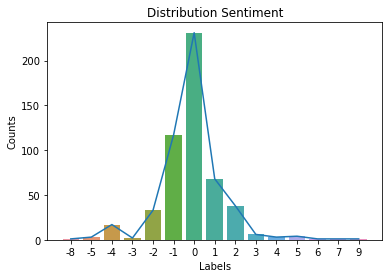

In [22]:
# plotting data_tweets
 
labels, counts = np.unique(hasil, return_counts=True)

fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())

sns.barplot(x = list(labels), 
            y = list(counts))

sns.lineplot(x = ax.get_xticks(), 
            y = list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()

Secara kategorikal sentiment dapat dilihat seperti plot berikut

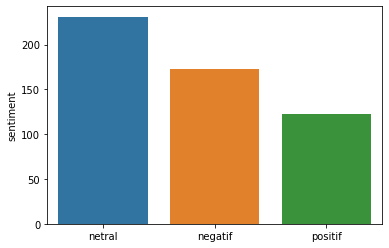

In [23]:
# Bila kita lakukan plot secara kategorikal
sns.barplot(x = data_tweets['sentiment'].value_counts().index, y = data_tweets['sentiment'].value_counts())
plt.show()

Analisis sentiment berikutnya kita lakukan terhadap data_news yang telah dibersihkan

In [7]:
#Sentiment Analysis dengan memasukkan hasilnya pada dataframe dengan nama kolom "sentiment"

with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

hasil_news = []

for tweet_clean in data_news['clean_title']:
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negati
    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count
    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
# 
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil_news.append(good_count - bad_count)
    print ("-----------------------------------------------------")
# 
sentiments_news = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil_news ]
data_news["sentiment"] = sentiments_news
data_news

positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
ok
positif: 1
negatif: 0
-----------------------------------------------------
memenuhi
lulus
kelu
positif: 2
negatif: 1
-----------------------------------------------------
ok
sok
positif: 1
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
penjelasan
jelas
positif: 2
negatif: 0
-----------------------------------------------------
semoga
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------


,Title,clean_title,sentiment
0,"Sekolah Kedinasan 2022 Dibuka, Simak Syarat da...",sekolah kedinasan dibuka simak syarat daftar,netral
1,"Jurusan di PKN STAN, Daftar di Seleksi Sekolah...",jurusan pkn stan daftar seleksi sekolah kedina...,netral
2,Pendaftaran Sekolah Kedinasan 2022: Ini Syarat...,pendaftaran sekolah kedinasan syarat dokumen p...,positif
3,"Sistem Gugur di PKN STAN, Drop Out jika Tak Me...",sistem gugur pkn stan drop out memenuhi syarat...,positif
4,"Daftar Sekolah Kedinasan Mulai Besok, Cek Skor...",daftar sekolah kedinasan besok cek skor ambang...,netral
5,"PKN STAN Umumkan Kuota Mahasiswa Baru 2022, Be...",pkn stan umumkan kuota mahasiswa,netral
6,Poltek Siber dan Sandi Negara Hanya Terima Pri...,poltek siber sandi negara terima pria bssn pen...,positif
7,Klik dikdin.bkn.go.id untuk Daftar Sekolah Ked...,klik dikdinbkngoid daftar sekolah kedinasan se...,positif
8,"Pendaftaran STAN Mulai 9 April, Cek Syarat dan...",pendaftaran stan april cek syarat nilai rapor ...,netral


Kemudian kita coba tampilkan descriptive statistic dari data_news

In [8]:
# menampilkan descriptive statistics untuk data_news

print (f'''
Mean: {np.mean(hasil_news)}
Median: {np.median(hasil_news)}
quartil awal: {np.quantile(hasil_news,0.25)}
quartil akhir: {np.quantile(hasil_news,0.75)}
Standar deviasi: {np.std(hasil_news)}     
''')


Mean: 0.5555555555555556
Median: 0.0
quartil awal: 0.0
quartil akhir: 1.0
Standar deviasi: 0.6849348892187752     



Dari descritive statictic diatas kita buat plottingnya seperti berikut:

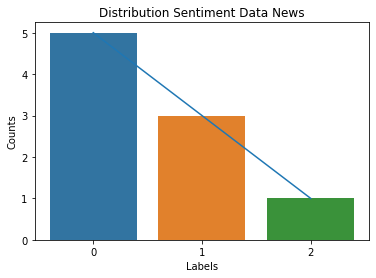

In [9]:
# plotting data_news
 
labels_news, counts_news = np.unique(hasil_news, return_counts=True)

fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())

sns.barplot(x = list(labels_news), 
            y = list(counts_news))

sns.lineplot(x = ax.get_xticks(), 
            y = list(counts_news))

plt.title(f'Distribution Sentiment Data News')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()

Secara kategorikal sentiment untuk data_news ini dapat kita lihat plot berikut:

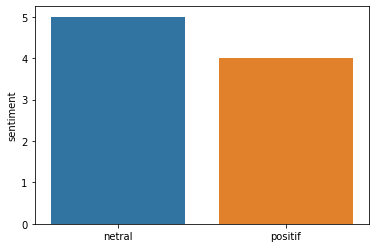

In [10]:
# Bila kita lakukan plot secara kategorikal terhadap data_news 
sns.barplot(x = data_news['sentiment'].value_counts().index, y = data_news['sentiment'].value_counts())
plt.show()

<h4>Analisis</h4>
Dari data tweet dari 4 hari sebelumnya hingga sekarang ternyata kebanyakan masyarakat bersikap netral terhadap pengadaan sekolah kedinasan ini dan lebih banyak yang berangkapan negatif jika dibandingkan anggapan positif. 
Disisi lain jika kita lihat dari data news masyarakat juga lebih bersikap netral dibanding dengan positif. Berdasarkan data ini dapat kita simpulkan bahwa perlu adanya peningkatan perbaikan kembali dalam hal informasi, sistem, dan yang berkaitan dengan sekolah kedinasan ini agar masyarakat dapat menilai lebih positif lagi dan minat yang lebih untuk mengikuti program tersebut.